### 欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0,1,size=100)

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [4]:
lin_reg.fit(X,y)
y_predict = lin_reg.predict(X)

In [5]:
from sklearn.metrics import mean_squared_error

In [6]:
mean_squared_error(y,y_predict)

2.623198070009018

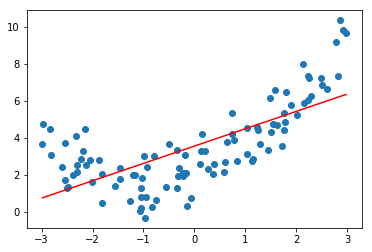

In [7]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')
plt.show()

### 好的拟合

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [9]:
def PolynomialRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_reg",StandardScaler()),
        ("lin_reg",LinearRegression())
    ])

In [10]:
poly2_reg = PolynomialRegression(degree=2)

In [11]:
poly2_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_reg', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [12]:
y2_predict = poly2_reg.predict(X)

In [13]:
mean_squared_error(y,y2_predict)

0.9525030597053891

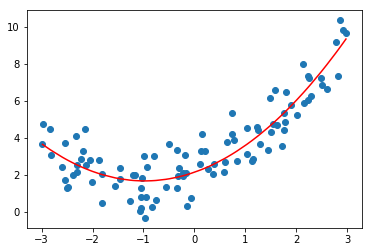

In [14]:
plt.scatter(x,y)
plt.plot(np.sort(x),y2_predict[np.argsort(x)],color='r')
plt.show()

### 过拟合

In [15]:
poly100_reg = PolynomialRegression(degree=100)

In [16]:
poly100_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=100, include_bias=True, interaction_only=False)), ('std_reg', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [17]:
y100_predict = poly100_reg.predict(X)

In [18]:
mean_squared_error(y,y100_predict)

0.5187151383337093

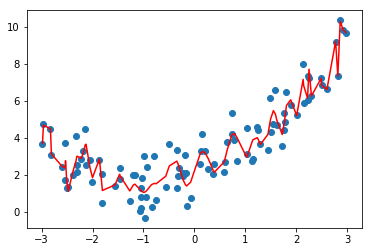

In [19]:
plt.scatter(x,y)
plt.plot(np.sort(x),y100_predict[np.argsort(x)],color='r')
plt.show()

### 总结：虽然第三种的平方误差最小，但是模型的泛化能力较差，而且太过复杂